# Arbol de desición
+ Aprendizaje supervisado.
+ Ampliamente extendido.
+ Diferentes algoritmos derivan de los árboles de decisión.
+ Primeras versiones por Leo Breiman.
+ Utilizados para clasificación y regresión
+ Aprenden de los datos generando reglas de tipo if-else.
+ Divisiones conocidas como nodos.
+ Cuando un nodo no conduce a nuevas divisiones, se le denomina hoja.
## Ejemplo
!['ejemplo_arbol.png'](./img/ej_arbol_desicion.png)

## Terminologia de un arbol de decisión

![tree_terminology](./img/tree_terminology.png)

+ **Pruning (Poda)**: Establecer una profundidad del arbol, con el fin de que no crezca 
+ **Rama**: El nodo y la subdivisón que se va generando.
+ **Nodo madre e hijo**: Nodos 

## Ventajas
+ Algoritmo de caja blanca.
+ Resltados fáciles de interpretar y de endender.
+ Las combinaciones de los mismos pueden dar resultados muy certeros. Por ejemplo, Random forest.

## Desventajas
+ Tienden al sobreajuste u overfiting.
+ Se ven infuenciadas por los outliers.
+ Crear árboles demasiado complejos pueden conllevar que no se adapten bien a los nuevos datos.
+ Se pueden crear árboles sesgados si una de las clases es más numerosa.

## ¿Cuando usar árboles de decisión?
+ Sencillo y fácil de entender.
+ Funcionan bastante bien con grandes conjuntos de datos.
+ Relativamente robusto.
+ Es un método muy útil para analizar datos cuantitativos.
+ Aplica para clasificación y regresión.

In [2]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# cargar el dataset
df_titanic = pd.read_csv('./data/titanic.csv', sep=',')

## Exploración de datos

In [4]:
# visualización del Dataframe
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [5]:
# Eliminar columnas no importantes para el modelo
columns_to_drop = ['Name', 'Fare']
df_titanic.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
# Renombrar las columnas
df_titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
# analizar el shape del objeto
df_titanic.shape

(887, 6)

In [8]:
# Visualizar los tipos de datos
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [9]:
# cambiamos los tipos de datos
df_titanic =  pd.get_dummies(df_titanic, columns= ['Sex'], drop_first= True)
df_titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [10]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [11]:
# renombrar el campo Sex
df_titanic.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [12]:
#Ordenar columnas por nombre
df_titanic = df_titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento

In [13]:
# Separando en X, y
X = df_titanic.drop('Survived', axis= 1)
y = df_titanic.Survived

In [14]:
# Importar las librerias necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

# 30% para el test y 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [15]:
# Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [16]:
# Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evalución

In [18]:
# Calculo de las predicciones en train y test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [19]:
# Calculo de las metricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy in train is: ',  train_accuracy)
print('El accuracy in test is: ', test_accuracy)

El accuracy in train is:  0.8048387096774193
El accuracy in test is:  0.7640449438202247


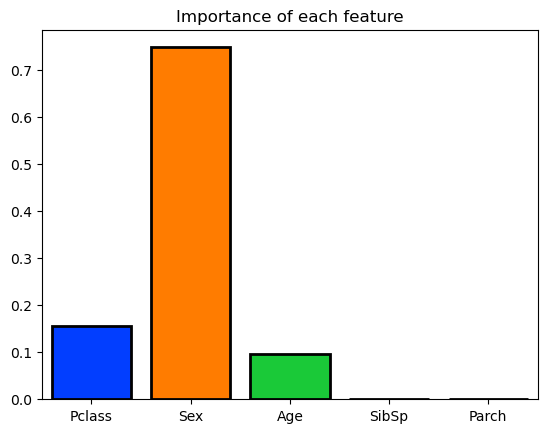

In [21]:
# Verificar el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importance of each feature')
plt.show()

### Conclución
Podemos observar quje para cada clasificación del modelo en base a la variable target: Survived, los features mas importantes son: Sex, seguido de Pclass y luego de Age. También es importante destacar que se observa un performance parecida en la métrica de Accuracy para los datos de train y test, lo cual es claramente positivo para el modelo